In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def relaxation(mat: np.ndarray, tol=1e-10, maxiter=1000) -> np.ndarray:
    """Relaxation method for solving Laplace's equation.

    input:
        mat: initial guess
        tol: tolerance
        maxiter: maximum number of iterations

    output:
        mat_new: solution
    """
    mat_new = mat.copy()

    for i in range(maxiter):
        # update interior points
        mat_new[1:-1, 1:-1] = 0.25 * (mat_new[:-2, 1:-1] + mat_new[2:, 1:-1] + mat_new[1:-1, :-2] + mat_new[1:-1, 2:])
        if np.max(np.abs(mat_new - mat)) < tol:
            break

        mat = mat_new.copy()
    return mat_new

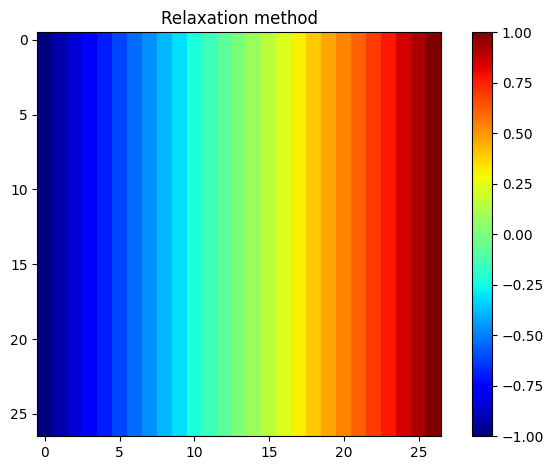

In [ ]:
# set parameters
s = 27
MAT = np.zeros((s, s))

# set boundary conditions
MAT[0, :] = np.linspace(-1, 1, s)
MAT[-1, :] = np.linspace(-1, 1, s)
MAT[:, 0] = -np.ones(s)
MAT[:, -1] = np.ones(s)

# solve
MAT = relaxation(MAT)

# color map
fig, ax = plt.subplots()
ax.set_title("Relaxation method")
im = ax.imshow(MAT, cmap="jet")
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()